In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import random
import os

In [2]:
%run ./Combine_csv.ipynb

In [3]:
import datetime

now = datetime.datetime.now()


Today_time = now.strftime("%H:%M")

Today_date = now.strftime("%Y-%m-%d")


In [25]:
prefix_dir =r"C:\Users\drago\Documents\GitHub\Summer-Project\Technology\Combined CSV\ "
suffix_dir = 'combined_technology-'+Today_date+'.csv'
today_csv=prefix_dir[:-1] +suffix_dir

In [26]:
today_csv

'C:\\Users\\drago\\Documents\\GitHub\\Summer-Project\\Technology\\Combined CSV\\combined_technology-2019-06-02.csv'

In [27]:
technology = pd.read_csv(today_csv)

In [28]:
technology.head()

,Newspaper,Heading,Date,Time,URL
0,Hindiustan Times,Xiaomi Redmi Note 7S to Samsung Galaxy M30: Be...,2019-06-02,14:02:00,https://www.hindustantimes.com/tech/xiaomi-red...
1,Hindiustan Times,"Tech Wrap: Redmi K20 Pro launch, updated iPod ...",2019-06-01,18:10:00,https://www.hindustantimes.com/tech/tech-wrap-...
2,Hindiustan Times,Google says sorry for sending Kohli’s message ...,2019-06-01,17:26:00,https://www.hindustantimes.com/tech/google-say...
3,Hindiustan Times,LG Uplus to create more 5G-based AR content,2019-06-01,17:03:00,https://www.hindustantimes.com/tech/lg-uplus-t...
4,Hindiustan Times,Instagram starts rolling out new Stories design,2019-06-01,16:59:00,https://www.hindustantimes.com/tech/instagram-...


In [29]:
technology.shape

(115, 5)

In [113]:
#df=technology[technology['Date']==Today_date]
df=technology

Heading = df['Heading']

In [114]:
df.head()

,Newspaper,Heading,Date,Time,URL
0,Hindiustan Times,Xiaomi Redmi Note 7S to Samsung Galaxy M30: Be...,2019-06-02,14:02:00,https://www.hindustantimes.com/tech/xiaomi-red...
1,Hindiustan Times,"Tech Wrap: Redmi K20 Pro launch, updated iPod ...",2019-06-01,18:10:00,https://www.hindustantimes.com/tech/tech-wrap-...
2,Hindiustan Times,Google says sorry for sending Kohli’s message ...,2019-06-01,17:26:00,https://www.hindustantimes.com/tech/google-say...
3,Hindiustan Times,LG Uplus to create more 5G-based AR content,2019-06-01,17:03:00,https://www.hindustantimes.com/tech/lg-uplus-t...
4,Hindiustan Times,Instagram starts rolling out new Stories design,2019-06-01,16:59:00,https://www.hindustantimes.com/tech/instagram-...


In [115]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.decomposition import TruncatedSVD

In [116]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\drago\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [117]:
stopset = set(stopwords.words('english'))

In [118]:
#### Delete This
#from sklearn.datasets import fetch_20newsgroups
#categories = ['rec.sport.baseball']
#dataset = fetch_20newsgroups(subset='all',shuffle=True, random_state=42, categories=categories)
#corpus=dataset.data


Tokenizing and Stemming

In [119]:
import nltk
import re

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\drago\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [120]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [121]:
def tokenize_and_stem(text):
   
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []

    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):

    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
   
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [122]:
Heading_stemmed = []
Heading_tokenized = []
for i in Heading:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'Heading', tokenize/stem
    Heading_stemmed.extend(allwords_stemmed) #extend the 'Heading_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    Heading_tokenized.extend(allwords_tokenized)

In [123]:
 Heading_tokenized[:10]    # 10 out of all

['xiaomi',
 'redmi',
 'note',
 '7s',
 'to',
 'samsung',
 'galaxy',
 'm30',
 'best',
 'smartphones']

In [124]:

Heading_stemmed[:10]   # 10 out of all

['xiaomi',
 'redmi',
 'note',
 '7s',
 'to',
 'samsung',
 'galaxi',
 'm30',
 'best',
 'smartphon']

In [125]:
words_frame = pd.DataFrame({'words': Heading_tokenized}, index = Heading_stemmed)

In [126]:
words_frame.head(10)

,words
xiaomi,xiaomi
redmi,redmi
note,note
7s,7s
to,to
samsung,samsung
galaxi,galaxy
m30,m30
best,best
smartphon,smartphones


TF-IDF

In [127]:
##Important : min_df
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,4))

In [128]:
tfidf_matrix = vectorizer.fit_transform(Heading)

In [129]:
print(tfidf_matrix.shape)

(115, 2527)


In [130]:
print(tfidf_matrix[0])

  (0, 2468)	0.12998212793686556
  (0, 1764)	0.12679915799262972
  (0, 1420)	0.1238521881205504
  (0, 78)	0.16479592620917047
  (0, 1917)	0.11385844484248026
  (0, 734)	0.11854219272322662
  (0, 1223)	0.17366942933927518
  (0, 295)	0.16479592620917047
  (0, 2005)	0.1372323079011462
  (0, 1851)	0.1461058110312509
  (0, 2477)	0.1514158064285747
  (0, 1773)	0.1414220631505045
  (0, 1421)	0.16479592620917047
  (0, 88)	0.20123304764729943
  (0, 1921)	0.11854219272322662
  (0, 760)	0.17366942933927518
  (0, 1227)	0.20123304764729943
  (0, 299)	0.17366942933927518
  (0, 2017)	0.17366942933927518
  (0, 2480)	0.15754574624488984
  (0, 1774)	0.16479592620917047
  (0, 1428)	0.20123304764729943
  (0, 89)	0.20123304764729943
  (0, 1932)	0.17366942933927518
  (0, 763)	0.20123304764729943
  (0, 1228)	0.20123304764729943
  (0, 303)	0.17366942933927518
  (0, 2481)	0.16479592620917047
  (0, 1778)	0.20123304764729943
  (0, 1429)	0.20123304764729943
  (0, 90)	0.20123304764729943
  (0, 1934)	0.2012330476472

In [131]:
vectorizer.get_feature_names()[:] 

["'s",
 "'s expect",
 "'s twice",
 "'s twice hope",
 "'s twice hope job",
 "'s wwdc",
 "'s wwdc invit",
 "'s wwdc invit begin",
 '12gb',
 '12gb ram',
 '12gb ram model',
 '12gb ram model work',
 '150mb',
 '150mb 200mb',
 '16xs',
 '16xs tripl',
 '16xs tripl rear',
 '16xs tripl rear camera',
 '1st',
 '1st decis',
 '1st decis aid',
 '1st decis aid famili',
 '200mb',
 '20w',
 '20w wireless',
 '20w wireless charg',
 '20w wireless charg featur',
 '2gb',
 '2gb data',
 '2gb data daili',
 '2gb data daili day',
 '3.5mm',
 '3.5mm headphon',
 '3.5mm headphon jack',
 '3.5mm headphon jack report',
 '30-day',
 '30-day exchang',
 '30-day exchang plan',
 '30-day exchang plan mi',
 '3a',
 '3a best',
 '3a best phone',
 '3a best phone buy',
 '3a xl',
 '3a xl vs',
 '3a xl vs samsung',
 '45w',
 '45w fast',
 '45w fast charg',
 '45w fast charg support',
 '48-megapixel',
 '48-megapixel camera',
 '48-megapixel camera goe',
 '48-megapixel camera goe sale',
 '48mp',
 '48mp camera',
 '48mp camera snapdragon',
 '48m

In [132]:
terms = vectorizer.get_feature_names()

Cosine similarity

In [133]:
from sklearn.metrics.pairwise import cosine_similarity


In [134]:
dist = cosine_similarity(tfidf_matrix)

In [135]:
dist.shape

(115, 115)

In [136]:
print(dist)

[[1.         0.01308161 0.         ... 0.         0.         0.        ]
 [0.01308161 1.         0.         ... 0.         0.         0.00868809]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.00868809 0.         ... 0.         0.         1.        ]]


## K-Means

In [137]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd


### Finding Number of Clusters

In [138]:
n_clusters = list (range (14,20))
min=999
for n in n_clusters:
    km_ss = KMeans(n_clusters=n)
    #km_ss.fit(tfidf_matrix) 
    clusters_ss = km_ss.fit_predict(tfidf_matrix)
    #centers_ss = km_ss.cluster_centers_ 
    score = silhouette_score(dist,clusters_ss)
    if min>score:
        min=score
        n_score=n
    print ("For n = {}, silhouette score is {})".format(n, score))
    

For n = 14, silhouette score is 0.028610739269363653)
For n = 15, silhouette score is 0.031599823904420475)
For n = 16, silhouette score is 0.037917827156456634)
For n = 17, silhouette score is 0.039480730453244545)
For n = 18, silhouette score is 0.039077493504464884)
For n = 19, silhouette score is 0.05484777458387861)


In [139]:
n_score

14

In [140]:
num_clusters = n_score
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=14, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [141]:
clusters = km.labels_.tolist()

In [142]:
df['Cluster'] = clusters

In [143]:
#X_dist = km.transform(tfidf_matrix)**2  ###tranform returns distance from centroid
#sqddist = X_dist.sum(axis=1).round(2)
#df['sqddist'] = sqddist

In [144]:
df['Cluster'].value_counts()

0     19
8     13
11    12
6     11
5     10
3      8
12     7
9      7
7      6
4      6
1      5
13     4
2      4
10     3
Name: Cluster, dtype: int64

## Plotting the points

In [145]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [146]:
cluster_names = {}
keys = range(n_score)   ## n_score = number of clusters
for i in keys:
       cluster_names[i] = 'Cluster '+str(i)
print(cluster_names)

{0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3', 4: 'Cluster 4', 5: 'Cluster 5', 6: 'Cluster 6', 7: 'Cluster 7', 8: 'Cluster 8', 9: 'Cluster 9', 10: 'Cluster 10', 11: 'Cluster 11', 12: 'Cluster 12', 13: 'Cluster 13'}


In [147]:
number_of_colors = n_score

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
cluster_colors={}
for i in range(len(color)):
    cluster_colors[i]=color[i]
print(cluster_colors)

{0: '#FB5DD5', 1: '#8C1BAC', 2: '#60C948', 3: '#35BBE4', 4: '#78345E', 5: '#DCECCF', 6: '#F736CE', 7: '#F074A6', 8: '#9BC3B9', 9: '#AF0A34', 10: '#7C8BD5', 11: '#2CDFA1', 12: '#917ED1', 13: '#EEA632'}


In [148]:
type(cluster_colors)

dict

In [149]:
%matplotlib inline 
df_plot= pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=Heading)) 
df_plot.head()

,x,y,label,title
0,-0.020304,-0.004062,0,Xiaomi Redmi Note 7S to Samsung Galaxy M30: Be...
1,0.002046,-0.005868,4,"Tech Wrap: Redmi K20 Pro launch, updated iPod ..."
2,0.002037,0.002543,6,Google says sorry for sending Kohli’s message ...
3,-0.000921,0.000326,0,LG Uplus to create more 5G-based AR content
4,0.000057,-0.002970,9,Instagram starts rolling out new Stories design


In [150]:
groups = df_plot.groupby('label')

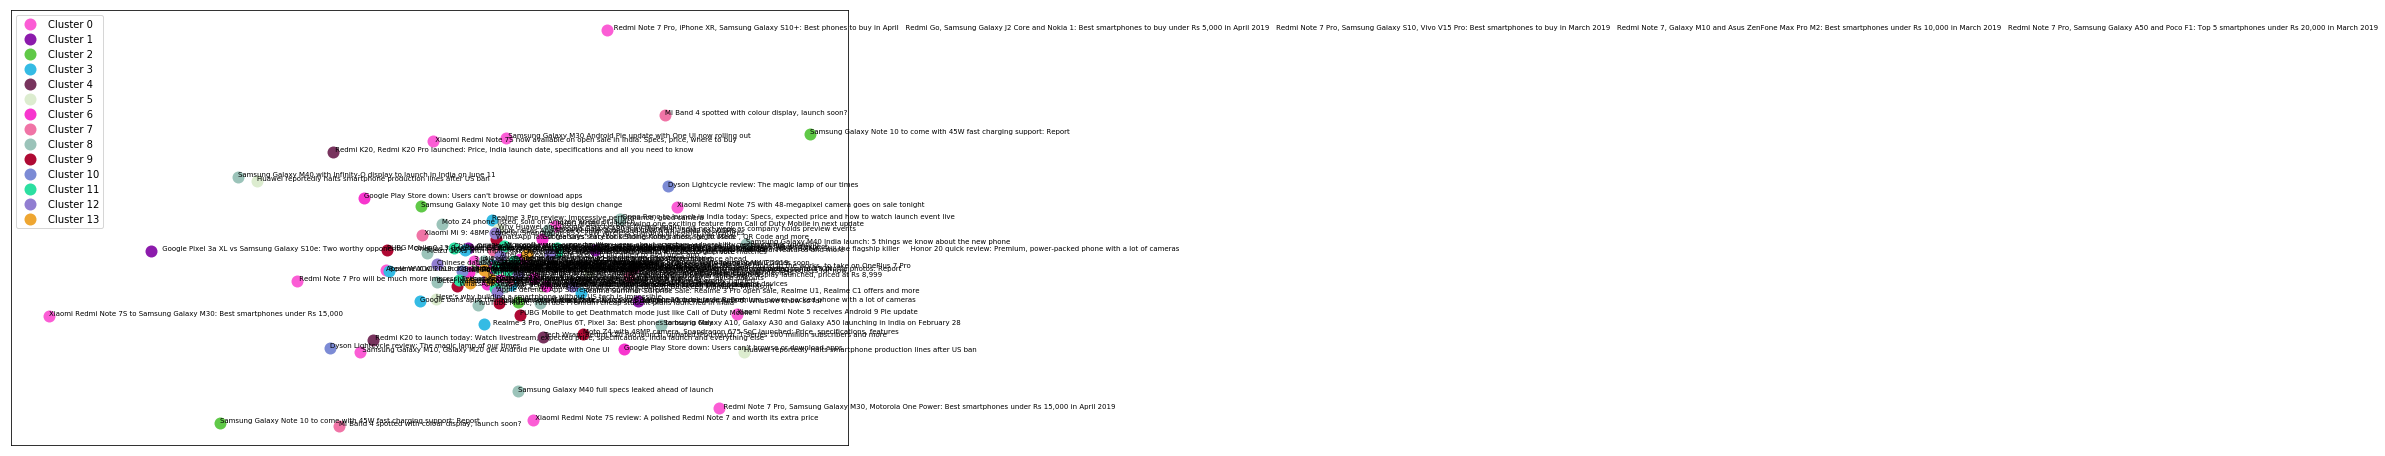

In [151]:
fig, ax = plt.subplots(figsize=(15, 8))

for name,group in groups:
    ax.plot(group.x, group.y, marker='o',linestyle='',ms=12, label=cluster_names[name],color=cluster_colors[name],mec='none')
    ax.set_aspect('auto')   
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
ax.legend(numpoints=1)

for i in range(len(df_plot)):
    ax.text(df_plot.iloc[i]['x'], df_plot.iloc[i]['y'], df_plot.iloc[i]['title'], size=7)

### Closest Point to Centroid

In [152]:
#centers = np.array(km.cluster_centers_)

In [153]:
#data_99 = [ j for j, cluster in enumerate(clusters) if cluster == 1 ]


In [154]:
#cluster_tf_matrix = np.zeros( (  len(data_99) , centers.shape[1] ) )
#cluster_tf_matrix

In [155]:
#for row_num, data in enumerate(data_99):
 #       row = tfidf_matrix[data]
  #      cluster_tf_matrix[row_num] = row

In [156]:
#clostest_data = []
#for i in range(num_clusters):
 #   center = centers[i]
  #  data_i = [ j for j, cluster in enumerate(clusters) if cluster == i ]
    
    
   # cluster_tf_matrix = np.zeros( (  len(data_i) , centers.shape[1] ) )
    #for row_num, data in enumerate(data_i):
     #   row = tfidf_matrix[data]
      #  cluster_tf_matrix[row_num] = row

## Final Result

In [157]:
#df.sort_values(by='Cluster')

In [158]:
#print( "Sqd Dist Mean is {} and Std Deviation is {}".format(df['sqddist'].mean(),df['sqddist'].std()))

In [159]:
#dist_mean=df['sqddist'].mean()
#dist_std=df['sqddist'].std()

In [160]:
#df_less = df[df['sqddist']<dist_mean+dist_std] 

In [161]:
#df_less=df_less.reset_index().drop(['index'],axis=1)

In [162]:
#df_less

In [163]:
#Result = df_less.sort_values('Cluster').groupby(['Cluster'],as_index=False).apply(lambda x: x.sample(1)) ## picking 1 out of each cluster having mean+std/2 < centroid 


In [164]:
#Result = Result.reset_index().drop(['level_0','level_1'],axis=1)

In [165]:
#Result

In [166]:
#df_more = df[df['sqddist']>df['sqddist'].mean()+df['sqddist'].std()/2] 

In [167]:
#df_more

In [168]:
#Result = Result.append(df_more)

In [169]:
#Result=Result.reset_index().drop(['index'],axis=1)

In [170]:
##Result

In [171]:
#Final = Result.drop_duplicates()

 Cluster Similarity

In [172]:
df_sorted=df.sort_values(by='Cluster').reset_index()
df_sorted.drop(['index'],axis=1,inplace=True)

In [173]:
df_sorted.head()

,Newspaper,Heading,Date,Time,URL,Cluster
0,Hindiustan Times,Xiaomi Redmi Note 7S to Samsung Galaxy M30: Be...,2019-06-02,14:02:00,https://www.hindustantimes.com/tech/xiaomi-red...,0
1,Time of India,GTU students selected to go to Tel Aviv Univ,2019-05-30,13:20:34,https://timesofindia.indiatimes.com/entertainm...,0
2,Indian Express,Tata Sky changes prices for channel packs: Her...,2019-06-01,17:54:01:00,https://indianexpress.com/article/technology/t...,0
3,Hindiustan Times,Xiaomi Redmi Note 7S with 48-megapixel camera ...,2019-05-30,18:53:00,https://www.hindustantimes.com/tech/xiaomi-red...,0
4,India Today,PUBG MOBILE is borrowing one exciting feature...,2019-06-02,14:15,https://timesofindia.indiatimes.com/technology...,0


In [174]:
vectorizer = TfidfVectorizer()

In [175]:
grp = df.sort_values('Cluster').groupby(['Cluster'],as_index=False)

In [176]:
cluster_similarity_value =[]
def cluster_similarity(cluster):
    cluster_heading=cluster['Heading']
    cluster_matrix = vectorizer.fit_transform(cluster_heading)
    cluster_dist = cosine_similarity(cluster_matrix)
    cluster_elements_count = pd.DataFrame.count(cluster)
    #print(cluster_elements_count[0])
    
    x=[]
    for i in cluster_dist:
        #z=(i.sum()-1)/cluster_elements_count
        if((cluster_elements_count[0]-1)==0):
            y=1
        else:
            y=float("{0:.2f}".format(((i.sum())/(cluster_elements_count[0]))))
        x.append(y)
        cluster_similarity_value.append(y)
    print(x)
        
    print()
    print()

In [177]:
for i in range(n_score):
    cluster_similarity(grp.get_group(i))


[0.2, 0.08, 0.05, 0.12, 0.09, 0.14, 0.15, 0.08, 0.15, 0.08, 0.14, 0.08, 0.09, 0.08, 0.18, 0.19, 0.15, 0.06, 0.16]


[0.37, 0.33, 0.42, 0.24, 0.27]


[0.46, 0.63, 0.38, 0.63]


[0.21, 0.2, 0.22, 0.16, 0.14, 0.19, 0.18, 0.18]


[0.28, 0.32, 0.3, 0.26, 0.22, 0.21]


[0.17, 0.26, 0.13, 0.1, 0.12, 0.15, 0.15, 0.11, 0.26, 0.12]


[0.13, 0.13, 0.12, 0.12, 0.09, 0.11, 0.09, 0.15, 0.1, 0.21, 0.21]


[0.22, 0.21, 0.44, 0.44, 0.32, 0.22]


[0.15, 0.14, 0.17, 0.17, 0.15, 0.09, 0.1, 0.1, 0.11, 0.21, 0.14, 0.1, 0.19]


[0.19, 0.21, 0.23, 0.21, 0.22, 0.24, 0.15]


[0.69, 0.37, 0.69]


[0.11, 0.08, 0.13, 0.09, 0.1, 0.1, 0.1, 0.13, 0.1, 0.11, 0.08, 0.1]


[0.18, 0.2, 0.23, 0.23, 0.19, 0.2, 0.2]


[0.32, 0.27, 0.33, 0.27]




In [178]:
df_sorted['cluster_similarity_value']=cluster_similarity_value

In [179]:
df_sorted.groupby('Cluster')['cluster_similarity_value'].mean()


Cluster
0     0.119474
1     0.326000
2     0.525000
3     0.185000
4     0.265000
5     0.157000
6     0.132727
7     0.308333
8     0.140000
9     0.207143
10    0.583333
11    0.102500
12    0.204286
13    0.297500
Name: cluster_similarity_value, dtype: float64

In [180]:
df_sorted

,Newspaper,Heading,Date,Time,URL,Cluster,cluster_similarity_value
0,Hindiustan Times,Xiaomi Redmi Note 7S to Samsung Galaxy M30: Be...,2019-06-02,14:02:00,https://www.hindustantimes.com/tech/xiaomi-red...,0,0.20
1,Time of India,GTU students selected to go to Tel Aviv Univ,2019-05-30,13:20:34,https://timesofindia.indiatimes.com/entertainm...,0,0.08
2,Indian Express,Tata Sky changes prices for channel packs: Her...,2019-06-01,17:54:01:00,https://indianexpress.com/article/technology/t...,0,0.05
3,Hindiustan Times,Xiaomi Redmi Note 7S with 48-megapixel camera ...,2019-05-30,18:53:00,https://www.hindustantimes.com/tech/xiaomi-red...,0,0.12
4,India Today,PUBG MOBILE is borrowing one exciting feature...,2019-06-02,14:15,https://timesofindia.indiatimes.com/technology...,0,0.09
5,India Today,Xiaomi Redmi Note 7S review: A polished Redmi...,2019-06-02,14:15,https://timesofindia.indiatimes.com/technology...,0,0.14
6,India Today,Xiaomi Redmi Note 7S now available on open sa...,2019-06-02,14:15,https://timesofindia.indiatimes.com/technology...,0,0.15
7,India Today,Please note: Elon Musk is now called Elon Tusk,2019-06-02,14:15,https://timesofindia.indiatimes.com/technology...,0,0.08
8,India Today,Redmi Note 7 Pro will be much more impressive...,2019-06-02,14:15,https://timesofindia.indiatimes.com/technology...,0,0.15
9,Hindiustan Times,3 in 4 Indians use more than 1 device simultan...,2019-05-31,17:59:00,https://www.hindustantimes.com/tech/3-in-4-ind...,0,0.08


In [181]:
grp = df_sorted.sort_values('Cluster').groupby(['Cluster'],as_index=False)

In [182]:
col=df_sorted.columns

In [183]:
temp_more =[]
temp_less  =[]

In [184]:
def fix_you(cluster):
    cluster_mean = cluster['cluster_similarity_value'].mean()
    for i in range(len(cluster)):
        if (cluster.iloc[i]['cluster_similarity_value']<cluster_mean):
            temp_less.append(cluster.iloc[i])
        else:
            temp_more.append(cluster.iloc[i])

In [185]:
for i in range(n_score):
    fix_you(grp.get_group(i))


In [186]:
df_more_similar=pd.DataFrame(temp_more,columns=col)
df_less_similar=pd.DataFrame(temp_less,columns=col)


In [187]:
Result = df_more_similar.sort_values('Cluster').groupby(['Cluster'],as_index=False).apply(lambda x: x.sample(1)) ## picking 1 out of each cluster having mean+std/2 < centroid 
Result.head()

,,Newspaper,Heading,Date,Time,URL,Cluster,cluster_similarity_value
0,6,India Today,Xiaomi Redmi Note 7S now available on open sa...,2019-06-02,14:15,https://timesofindia.indiatimes.com/technology...,0,0.15
1,20,India Today,"Honor 20 quick review: Premium, power-pack...",2019-06-02,14:15,https://timesofindia.indiatimes.comhttps://www...,1,0.33
2,27,Indian Express,Samsung Galaxy Note 10 to come with 45W fast c...,2019-06-02,11:40:40:00,https://indianexpress.com/article/technology/m...,2,0.63
3,29,India Today,"Realme 3 Pro, OnePlus 6T, Pixel 3a: Best p...",2019-06-02,14:15,https://timesofindia.indiatimes.comhttps://www...,3,0.20
4,38,India Today,"Redmi K20 to launch today: Watch livestream, ...",2019-06-02,14:15,https://timesofindia.indiatimes.com/technology...,4,0.30


In [188]:
Result = Result.reset_index().drop(['level_0','level_1'],axis=1)

In [189]:
Result = Result.append(df_less_similar)

In [190]:
Result = Result.sort_values(by='Cluster')

In [191]:
Result=Result.reset_index().drop(['index'],axis=1)

In [192]:
Result

,Newspaper,Heading,Date,Time,URL,Cluster,cluster_similarity_value
0,India Today,Xiaomi Redmi Note 7S now available on open sa...,2019-06-02,14:15,https://timesofindia.indiatimes.com/technology...,0,0.15
1,Hindiustan Times,3 in 4 Indians use more than 1 device simultan...,2019-05-31,17:59:00,https://www.hindustantimes.com/tech/3-in-4-ind...,0,0.08
2,Time of India,GTU students selected to go to Tel Aviv Univ,2019-05-30,13:20:34,https://timesofindia.indiatimes.com/entertainm...,0,0.08
3,Indian Express,Tata Sky changes prices for channel packs: Her...,2019-06-01,17:54:01:00,https://indianexpress.com/article/technology/t...,0,0.05
4,India Today,PUBG MOBILE is borrowing one exciting feature...,2019-06-02,14:15,https://timesofindia.indiatimes.com/technology...,0,0.09
5,India Today,Please note: Elon Musk is now called Elon Tusk,2019-06-02,14:15,https://timesofindia.indiatimes.com/technology...,0,0.08
6,Hindiustan Times,"Apple WWDC 2019: iOS 13 update is coming soon,...",2019-05-31,17:13:00,https://www.hindustantimes.com/tech/wwdc-2019-...,0,0.08
7,Time of India,More than 200 engineering faculty from across ...,2019-05-30,14:41:39,https://timesofindia.indiatimes.com/entertainm...,0,0.09
8,Time of India,A fashion show at NIFT Gandhinagar,2019-05-31,09:00:49,https://timesofindia.indiatimes.com/entertainm...,0,0.06
9,Hindiustan Times,LG Uplus to create more 5G-based AR content,2019-06-01,17:03:00,https://www.hindustantimes.com/tech/lg-uplus-t...,0,0.08


In [193]:
outname ='Education-'+str(Today_date)+'.csv'
x=r"C:\Users\drago\Documents\GitHub\Summer-Project\Education\Output CSV\ "
if not os.path.exists(x[:-1]):
    os.mkdir(x[:-1])
date_today= Today_date +'\ '
outdir=x[:-1]
if not os.path.exists(outdir):
    os.mkdir(outdir)
fullname = os.path.join(outdir, outname) 

In [194]:
Result.to_csv(fullname,index=False,encoding='utf-8')

In [195]:
pd.read_csv(fullname)

,Newspaper,Heading,Date,Time,URL,Cluster,cluster_similarity_value
0,India Today,Xiaomi Redmi Note 7S now available on open sa...,2019-06-02,14:15,https://timesofindia.indiatimes.com/technology...,0,0.15
1,Hindiustan Times,3 in 4 Indians use more than 1 device simultan...,2019-05-31,17:59:00,https://www.hindustantimes.com/tech/3-in-4-ind...,0,0.08
2,Time of India,GTU students selected to go to Tel Aviv Univ,2019-05-30,13:20:34,https://timesofindia.indiatimes.com/entertainm...,0,0.08
3,Indian Express,Tata Sky changes prices for channel packs: Her...,2019-06-01,17:54:01:00,https://indianexpress.com/article/technology/t...,0,0.05
4,India Today,PUBG MOBILE is borrowing one exciting feature...,2019-06-02,14:15,https://timesofindia.indiatimes.com/technology...,0,0.09
5,India Today,Please note: Elon Musk is now called Elon Tusk,2019-06-02,14:15,https://timesofindia.indiatimes.com/technology...,0,0.08
6,Hindiustan Times,"Apple WWDC 2019: iOS 13 update is coming soon,...",2019-05-31,17:13:00,https://www.hindustantimes.com/tech/wwdc-2019-...,0,0.08
7,Time of India,More than 200 engineering faculty from across ...,2019-05-30,14:41:39,https://timesofindia.indiatimes.com/entertainm...,0,0.09
8,Time of India,A fashion show at NIFT Gandhinagar,2019-05-31,09:00:49,https://timesofindia.indiatimes.com/entertainm...,0,0.06
9,Hindiustan Times,LG Uplus to create more 5G-based AR content,2019-06-01,17:03:00,https://www.hindustantimes.com/tech/lg-uplus-t...,0,0.08
